In [1]:
print("Hi")

Hi


In [2]:
# import packages packages yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

## Data Wrangling

In [3]:
app_test = pd.read_csv("application_test.csv")
app_train = pd.read_csv("application_train.csv")

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [6]:
app_train_used=app_train[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS']]

In [7]:
app_test_used=app_test[['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS']]

In [8]:
app_train_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      307511 non-null  int64  
 1   NAME_CONTRACT_TYPE          307511 non-null  object 
 2   CODE_GENDER                 307511 non-null  object 
 3   FLAG_OWN_CAR                307511 non-null  object 
 4   FLAG_OWN_REALTY             307511 non-null  object 
 5   CNT_CHILDREN                307511 non-null  int64  
 6   AMT_INCOME_TOTAL            307511 non-null  float64
 7   AMT_CREDIT                  307511 non-null  float64
 8   AMT_ANNUITY                 307499 non-null  float64
 9   AMT_GOODS_PRICE             307233 non-null  float64
 10  NAME_TYPE_SUITE             306219 non-null  object 
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

In [9]:
app_train_used.isna().sum()

TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_TYPE_SUITE               1292
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
CNT_FAM_MEMBERS                  2
dtype: int64

In [10]:
app_test_used.isna().sum()

NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    24
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE               911
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
CNT_FAM_MEMBERS                 0
dtype: int64

In [11]:
app_train_used= app_train_used.dropna()
app_test_used = app_test_used.dropna()

In [12]:
app_train_used.isna().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
CNT_FAM_MEMBERS               0
dtype: int64

In [13]:
app_test_used.isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
CNT_FAM_MEMBERS               0
dtype: int64

In [14]:
print("Jumlah duplikasi: ",app_train_used.duplicated().sum())

Jumlah duplikasi:  16


In [15]:
app_train_used.drop_duplicates(inplace=True)

In [16]:
print("Jumlah duplikasi: ",app_train_used.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
print("Jumlah duplikasi: ",app_test_used.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
app_test_used.drop_duplicates(inplace=True)

In [19]:
print("Jumlah duplikasi: ",app_test_used.duplicated().sum())

Jumlah duplikasi:  0


In [20]:
print(app_train_used['TARGET'].unique(),'\n',
    app_train_used['NAME_CONTRACT_TYPE'].unique(),'\n',
      app_train_used['CODE_GENDER'].unique(),'\n',
      app_train_used['FLAG_OWN_CAR'].unique(),'\n',
      app_train_used['FLAG_OWN_REALTY'].unique(),'\n',
      app_train_used['NAME_TYPE_SUITE'].unique(),'\n',
      app_train_used['NAME_INCOME_TYPE'].unique(),'\n',
      app_train_used['NAME_EDUCATION_TYPE'].unique(),'\n',
      app_train_used['NAME_FAMILY_STATUS'].unique(),'\n',
      app_train_used['NAME_HOUSING_TYPE'].unique())

[1 0] 
 ['Cash loans' 'Revolving loans'] 
 ['M' 'F' 'XNA'] 
 ['N' 'Y'] 
 ['Y' 'N'] 
 ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people'] 
 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave'] 
 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 
 ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'] 
 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


In [21]:
app_train_used.drop(app_train_used.index[app_train_used['CODE_GENDER']=='XNA'],inplace=True)
app_train_used.drop(app_train_used.index[app_train_used['NAME_INCOME_TYPE']=='Maternity leave'],inplace=True)

## EDA

In [22]:
app_train_used.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,CNT_FAM_MEMBERS
count,306182.000000,306182.000000,3.061820e+05,3.061820e+05,306182.000000,3.061820e+05,306182.000000,306182.000000,306182.000000
mean,0.080841,0.417017,1.687835e+05,5.988111e+05,27122.237767,5.379571e+05,0.020864,-16040.463189,2.152791
std,0.272591,0.722108,2.375292e+05,4.019674e+05,14490.568657,3.689236e+05,0.013830,4362.659519,0.910584
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,1.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,0.010006,-19685.000000,2.000000
50%,0.000000,0.000000,1.476000e+05,5.135310e+05,24930.000000,4.500000e+05,0.018850,-15756.000000,2.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12418.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,20.000000


array([[<Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>],
       [<Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>],
       [<Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>]], dtype=object)

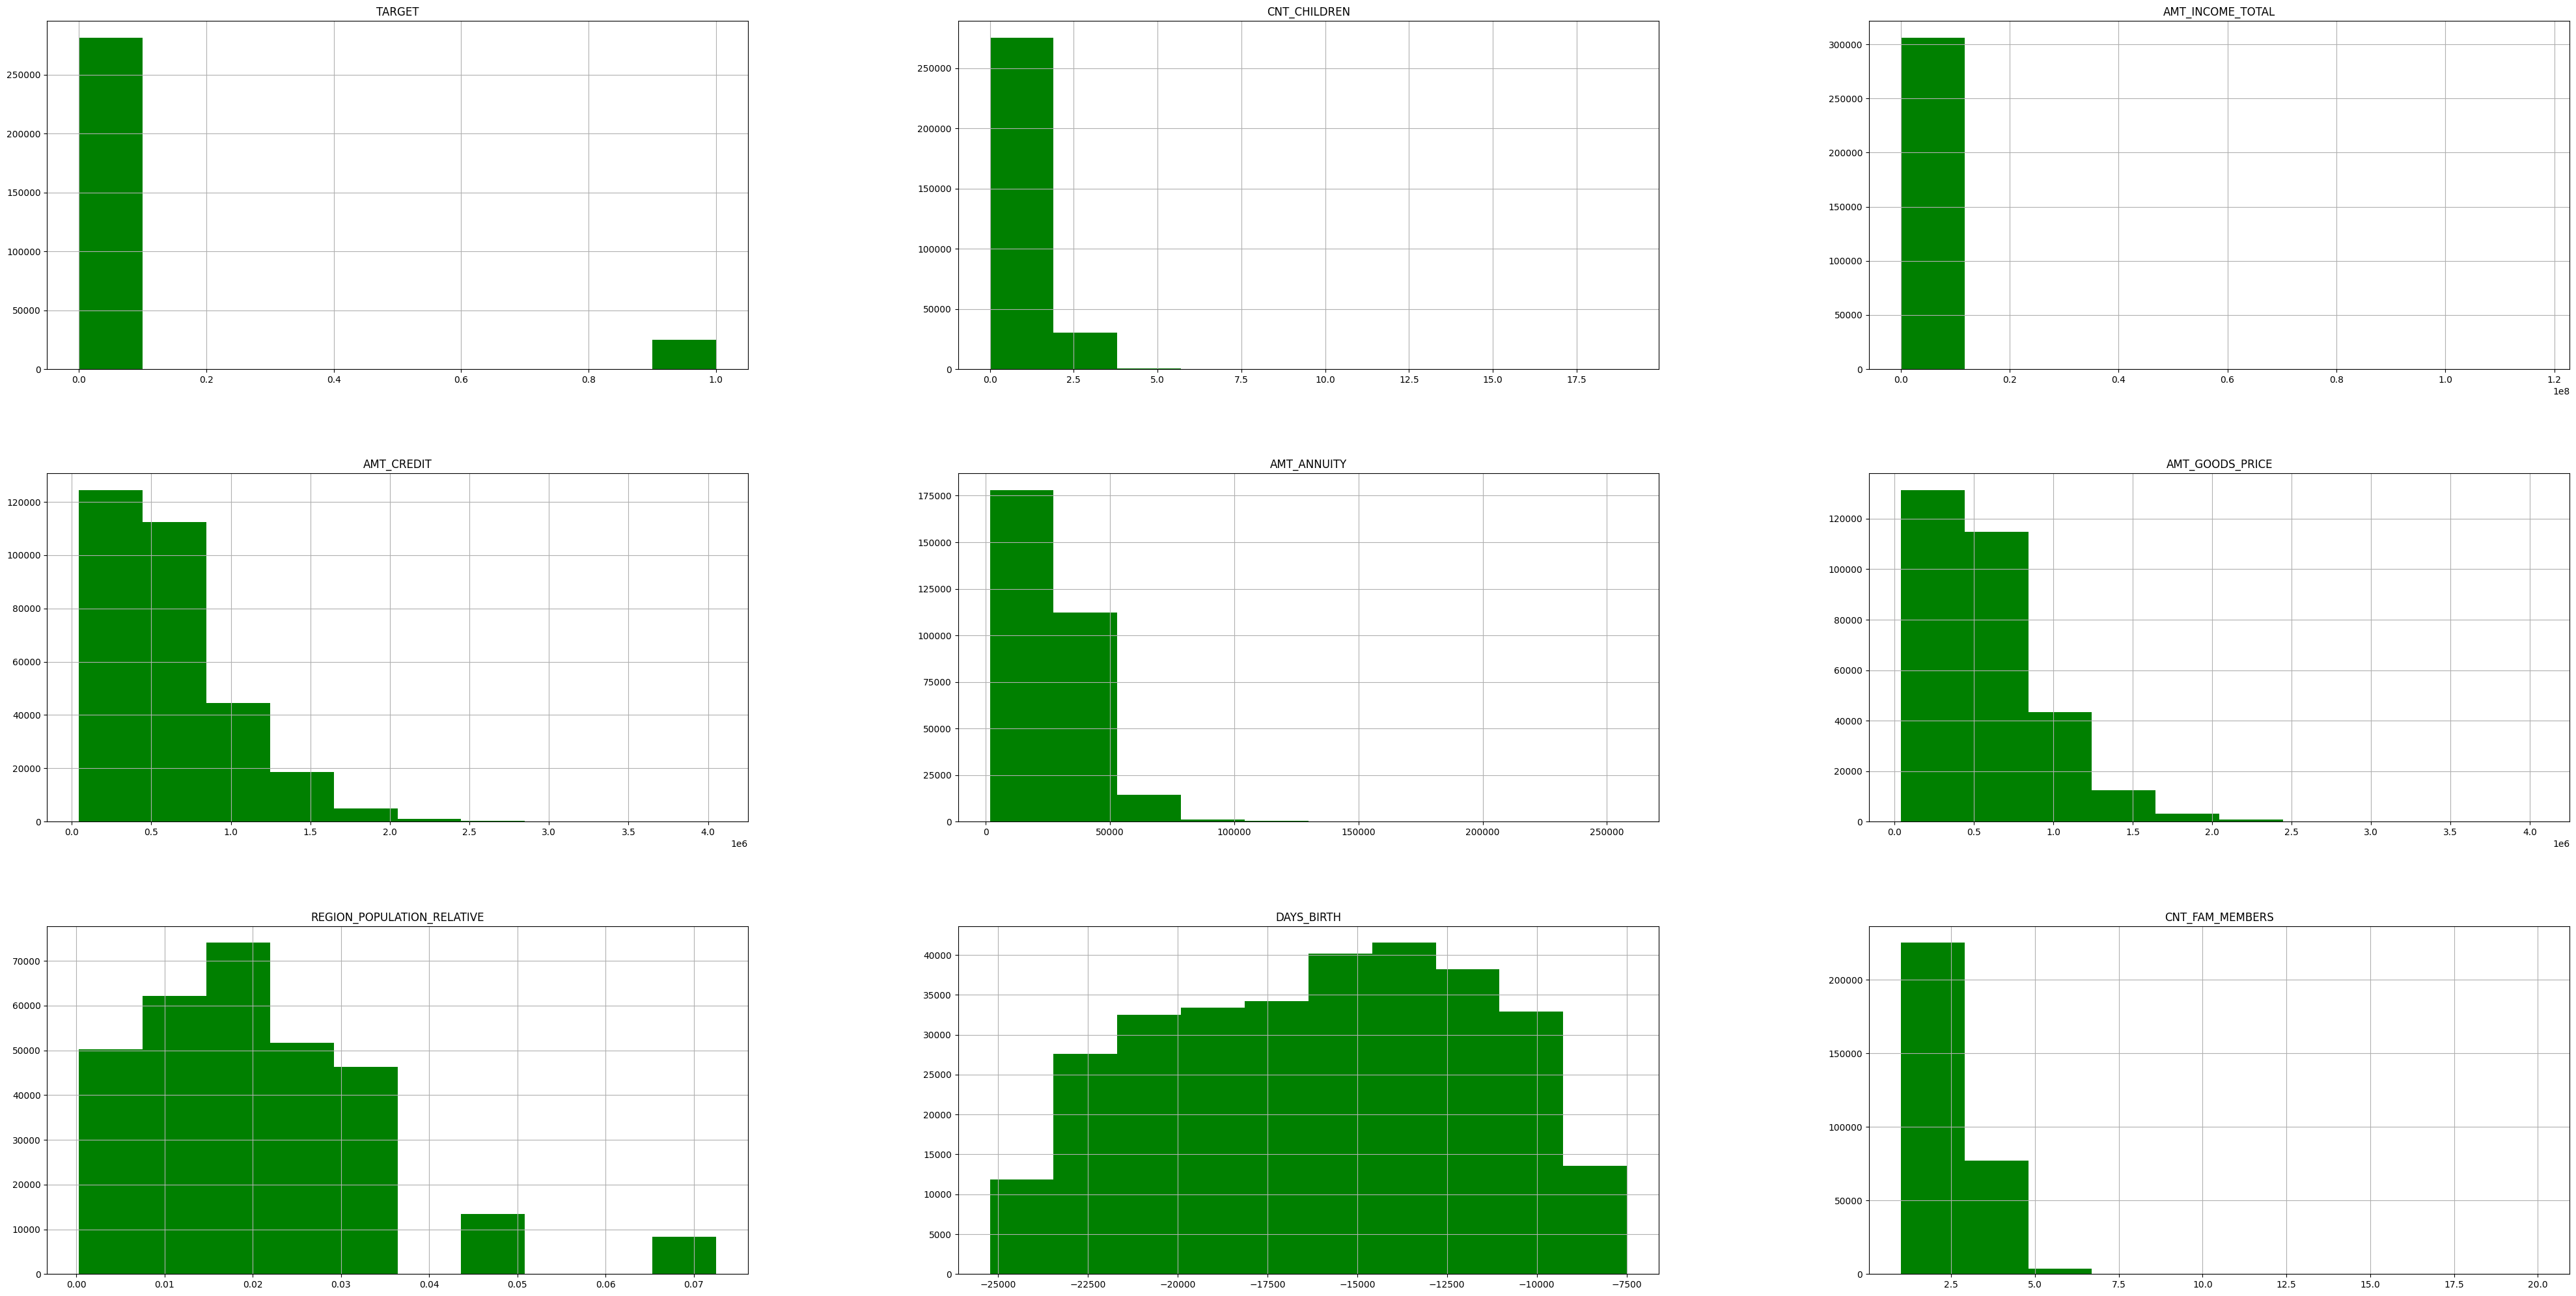

In [23]:
app_train_used.hist(figsize=(50,25),color='green')

Terlihat bahwa distribusi data tidak normal dan mayoritas right-skewed yaitu distribusi data yang  memiliki sebagian besar populasi data yang terkonsentrasi pada bagian kiri

<ipython-input-24-487fb107a670>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = app_train_used.corr()


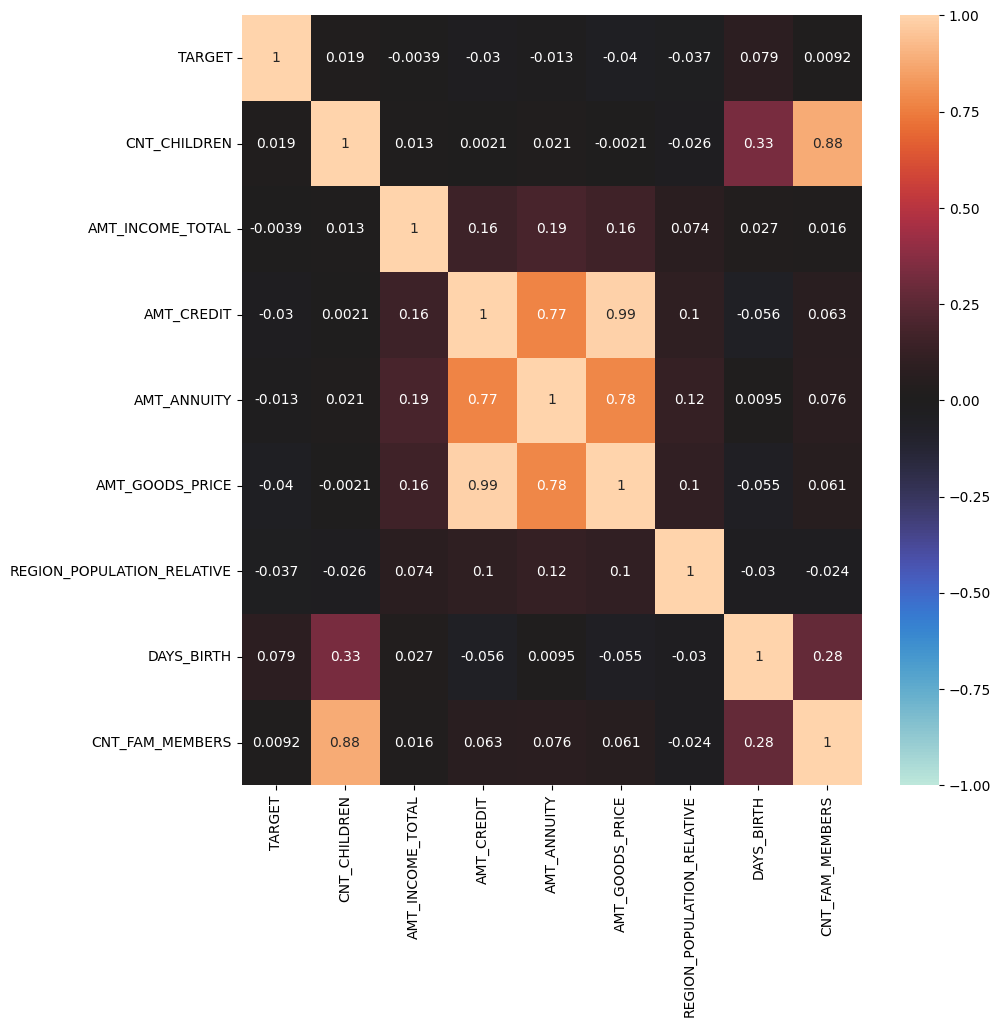

In [24]:
corr = app_train_used.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

Terlihat bahwa fitur-fitur memiliki korelasi yang rendah terhadap variabel Target

In [25]:
app_train_used.TARGET.value_counts()

0    281430
1     24752
Name: TARGET, dtype: int64



> 0 : pinjaman dilunasi tepat waktu


> 1 : orang yang mengalami kesulitan bayar






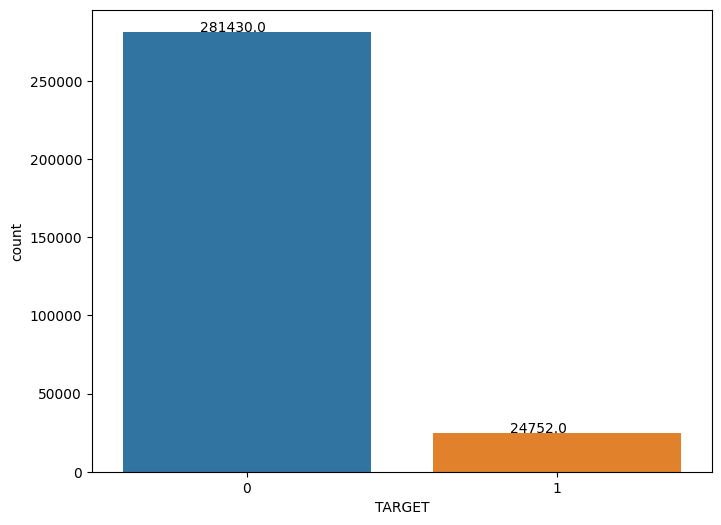

In [26]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data = app_train_used, x = 'TARGET', order=app_train_used['TARGET'].value_counts(ascending=False).index)

# Add annotations to the plot
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Berdasarkan hasil diatas dapat kita lihat bahwa kategori 0 lebih banyak yaitu sebesar 281430 dibanding kategori 1 yaitu sebesar 24752. Hal tersebut dapat diartikan bahwa hanya beberapa pelanggan saja yang mengalami kesulitan melakukan pembayaran.

<Axes: xlabel='TARGET', ylabel='count'>

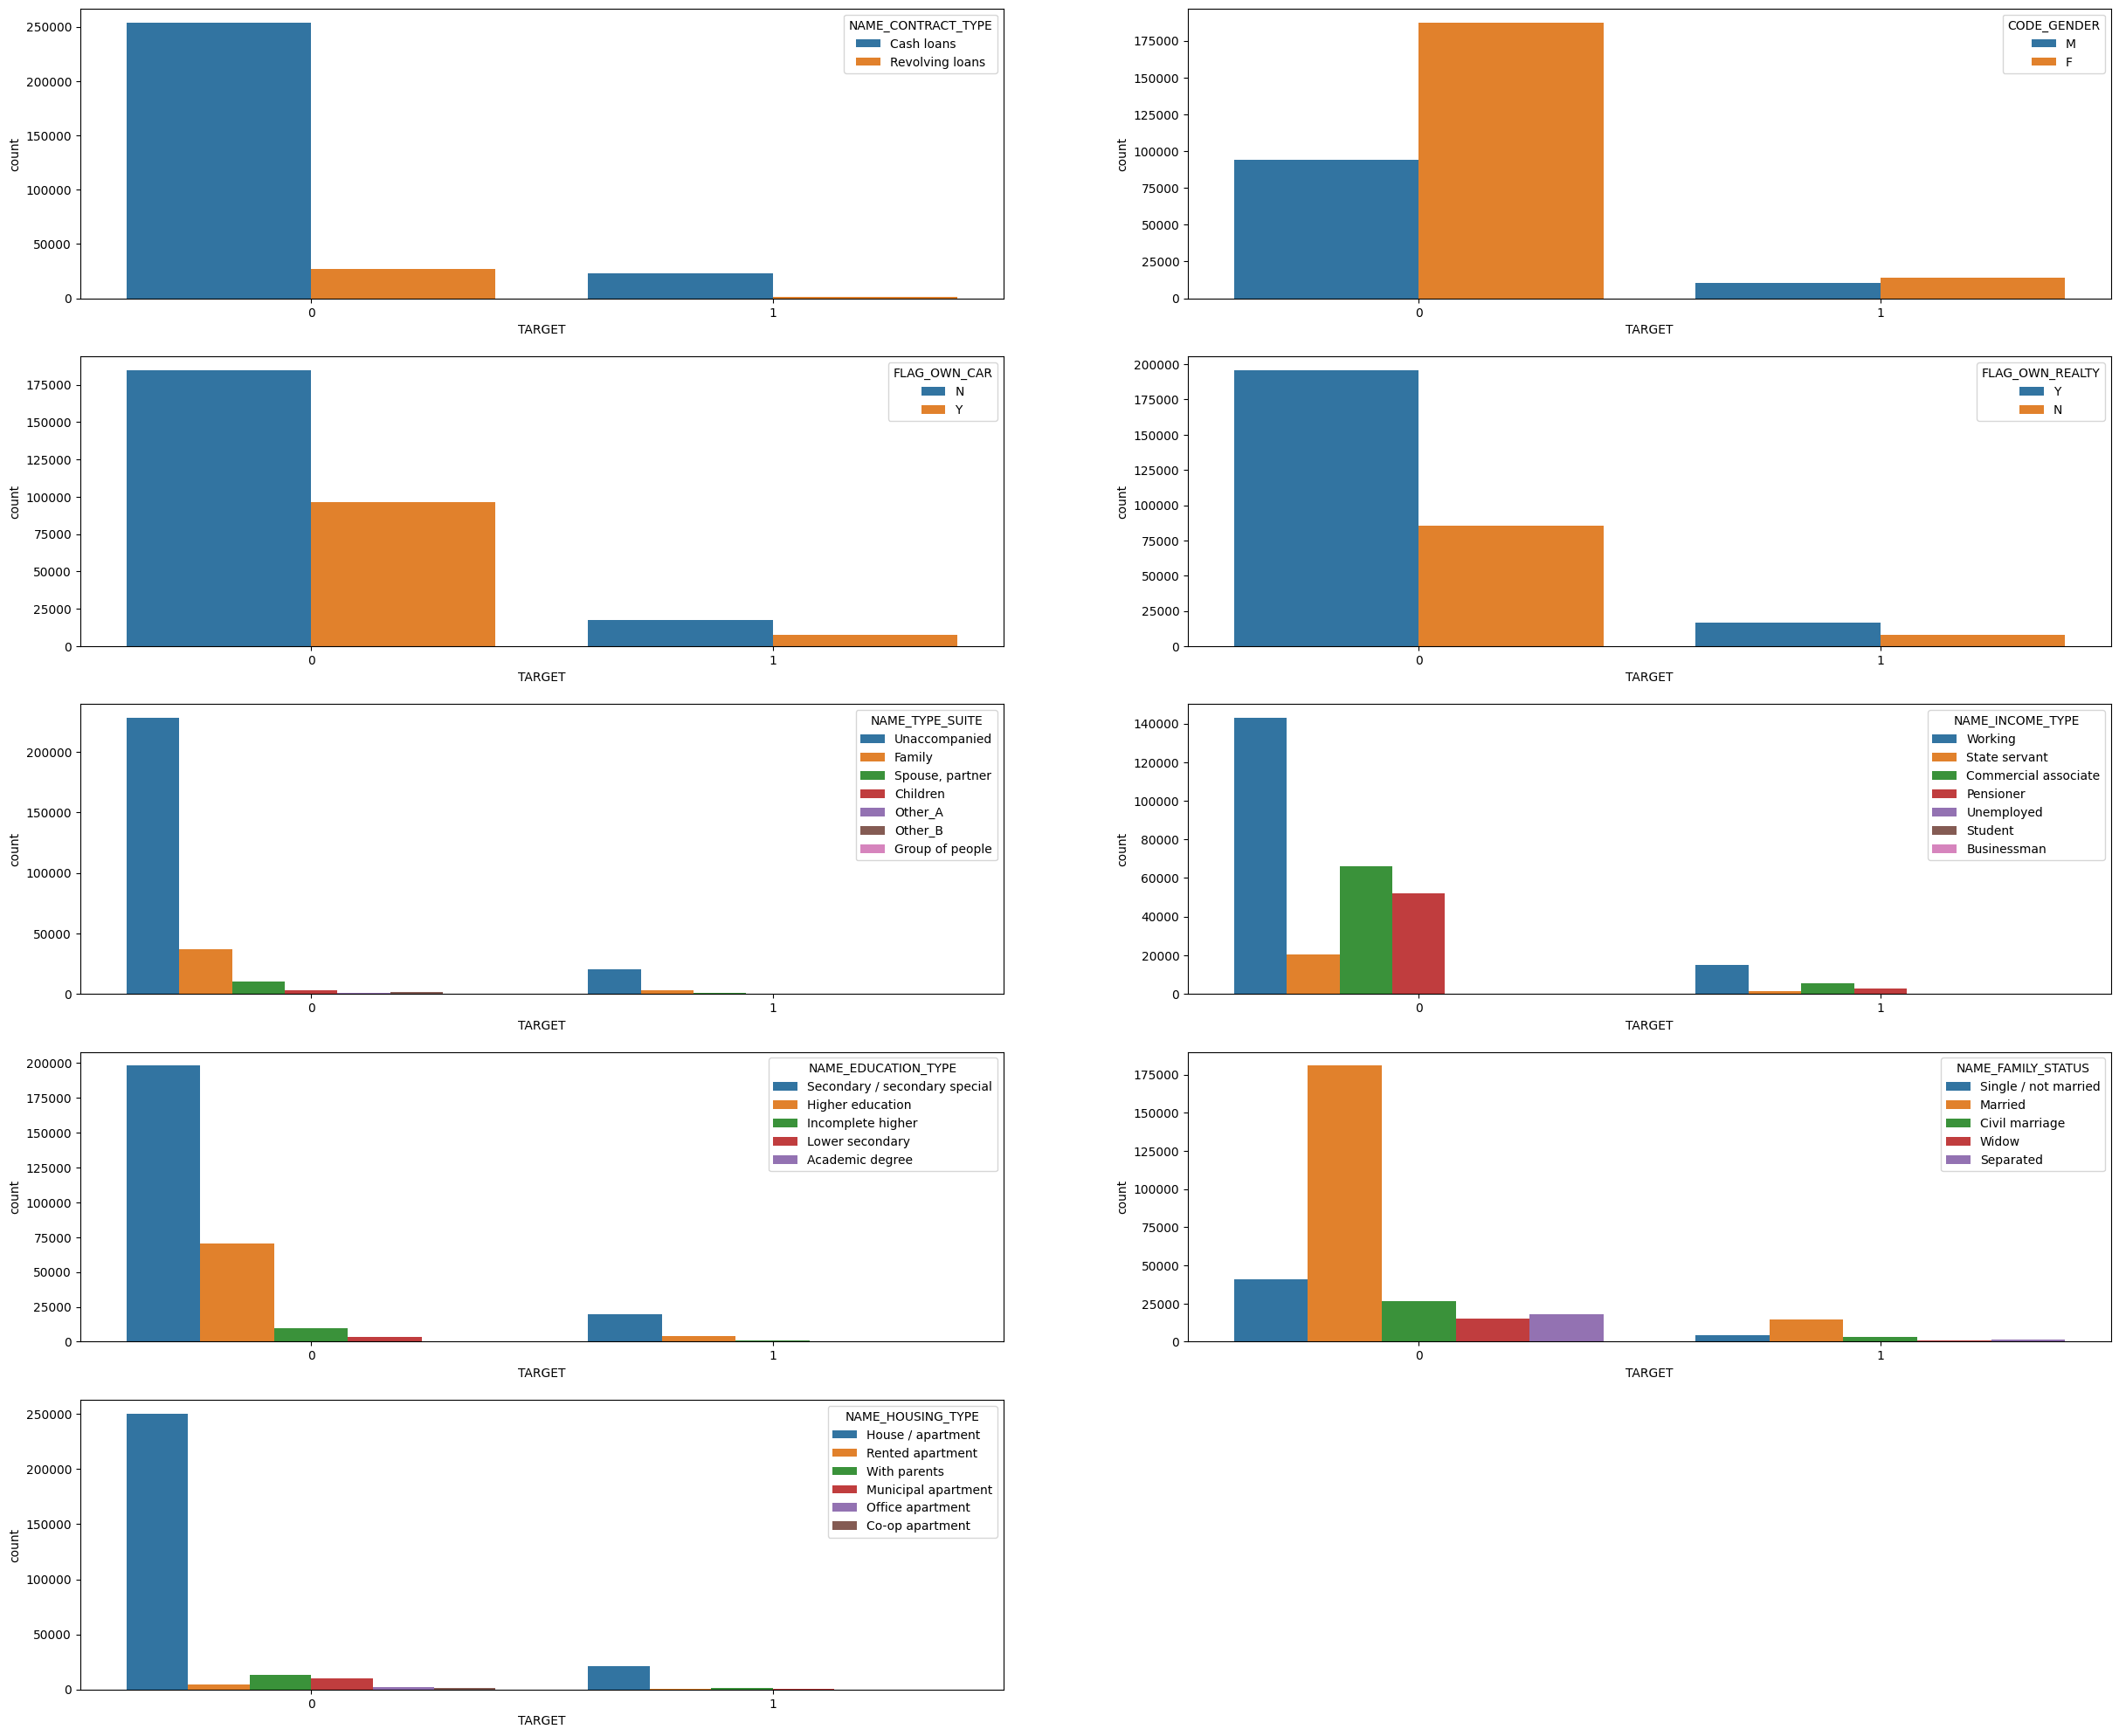

In [27]:
plt.figure(figsize=(30,25))

plt.subplot(5,2,1)
sns.countplot(x=app_train_used.TARGET,hue=app_train_used.NAME_CONTRACT_TYPE)

plt.subplot(5,2,2)
sns.countplot(x=app_train_used.TARGET,hue=app_train_used.CODE_GENDER)

plt.subplot(5,2,3)
sns.countplot(x=app_train_used.TARGET,hue=app_train_used.FLAG_OWN_CAR)

plt.subplot(5,2,4)
sns.countplot(x=app_train_used.TARGET,hue=app_train_used.FLAG_OWN_REALTY)

plt.subplot(5,2,5)
sns.countplot(x=app_train_used.TARGET,hue=app_train_used.NAME_TYPE_SUITE)

plt.subplot(5,2,6)
sns.countplot(x=app_train_used.TARGET,hue=app_train_used.NAME_INCOME_TYPE)

plt.subplot(5,2,7)
sns.countplot(x=app_train_used.TARGET,hue=app_train_used.NAME_EDUCATION_TYPE)

plt.subplot(5,2,8)
sns.countplot(x=app_train_used.TARGET,hue=app_train_used.NAME_FAMILY_STATUS)

plt.subplot(5,2,9)
sns.countplot(x=app_train_used.TARGET,hue=app_train_used.NAME_HOUSING_TYPE)

## Data Preprocessing

In [28]:
train_age=(app_train_used['DAYS_BIRTH']/-365).astype(int)
app_train_used=app_train_used.assign(AGE=train_age).drop('DAYS_BIRTH',axis=1)
app_train_used.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,AGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1.0,25
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,2.0,45
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1.0,52
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,2.0,52
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1.0,54


In [29]:
Test_age =(app_test_used['DAYS_BIRTH']/-365).astype(int)
app_test_used=app_test_used.assign(AGE=Test_age).drop('DAYS_BIRTH',axis=1)
app_test_used.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,AGE
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,2.0,52
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,2.0,49
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,4.0,38
4,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,3.0,35
5,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.025164,2.0,50


In [30]:
Umur = app_train_used[['TARGET', 'AGE']]
Umur['Grup_Umur'] = pd.cut(Umur['AGE'], bins = np.linspace(20, 70, num=6))
Umur = (Umur.groupby(['Grup_Umur']).mean()).sort_values('TARGET')
Umur

<ipython-input-30-1fc28becb6bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Umur['Grup_Umur'] = pd.cut(Umur['AGE'], bins = np.linspace(20, 70, num=6))


,TARGET,AGE
Grup_Umur,,
"(60.0, 70.0]",0.049321,63.467285
"(50.0, 60.0]",0.059315,55.402973
"(40.0, 50.0]",0.075517,45.245947
"(30.0, 40.0]",0.093088,35.610325
"(20.0, 30.0]",0.114353,26.691380


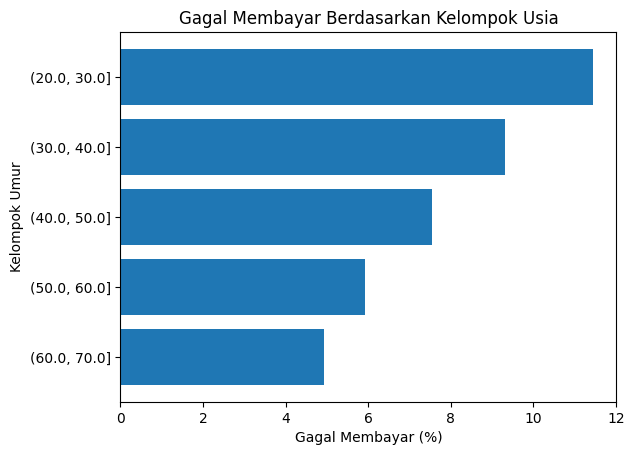

In [31]:
Umur.sort_values(by='TARGET', inplace=True)

plt.barh(y=Umur.index.astype(str), width=100*Umur["TARGET"])
plt.xlabel("Gagal Membayar (%)")
plt.ylabel("Kelompok Umur")
plt.title("Gagal Membayar Berdasarkan Kelompok Usia")
plt.show()

Terlihat bahwa kelompok umur (20-30] merupakan kelompok yang tingkat kegagalan membayar paling tinggi dan kelompok (60-70] merupakan kelompok yang tingkat kegagalan membayar paling rendah

In [32]:
l = LabelEncoder()
for q in app_test_used.describe(include='object').columns:
    app_test_used[q]=l.fit_transform(app_test_used[q])
app_test_used.head(3)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,AGE
0,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,2.0,52
1,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,2.0,49
3,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,4.0,38


In [33]:
l = LabelEncoder()
for p in app_train_used.describe(include='object').columns:
    app_train_used[p]=l.fit_transform(app_train_used[p])
app_train_used.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,AGE
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,6,4,3,1,0.018801,1.0,25
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,3,1,1,1,0.003541,2.0,45
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,6,4,3,1,0.010032,1.0,52


## Modelling

In [34]:
X = app_train_used.drop(columns=["TARGET"])
y = app_train_used["TARGET"]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((244945, 17), (61237, 17), (244945,), (61237,))

## XG Boost

In [36]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy : %.2f" % accuracy_score(ytest, pred))
    print("Precision : %.2f" % precision_score(ytest, pred))
    print("Recall : %.2f" % recall_score(ytest, pred))
    print("F1-Score : %.2f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

In [37]:
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

# Predict
y_pred_proba_xg = xg.predict_proba(X_test)
y_pred_test_xg = xg.predict(X_test)

In [38]:
eval_classification(xg, y_pred_test_xg, X_train, y_train, X_test, y_test)

Accuracy : 0.92
Precision : 0.33
Recall : 0.00
F1-Score : 0.00
AUC: 0.50


In [39]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 30, num = 6)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tuned.fit(X_train,y_train)

# Predict
y_pred_proba_xg_tuned = xg_tuned.predict_proba(X_test)
y_pred_test_xg_tuned = xg_tuned.predict(X_test)

In [40]:
print('Best max_depth:', xg_tuned.best_estimator_.get_params()['max_depth'])
print('Best min_child_weight:', xg_tuned.best_estimator_.get_params()['min_child_weight'])
print('Best gamma:', xg_tuned.best_estimator_.get_params()['gamma'])
print('Best tree_method:', xg_tuned.best_estimator_.get_params()['tree_method'])
print('Best colsample_bytree:', xg_tuned.best_estimator_.get_params()['colsample_bytree'])
print('Best eta:', xg_tuned.best_estimator_.get_params()['eta'])
print('Best lambda:', xg_tuned.best_estimator_.get_params()['lambda'])
print('Best alpha:', xg_tuned.best_estimator_.get_params()['alpha'])

Best max_depth: 26
Best min_child_weight: 10
Best gamma: 0.8
Best tree_method: auto
Best colsample_bytree: 0.2
Best eta: 0.2
Best lambda: 0.0
Best alpha: 0.6000000000000001


In [41]:
eval_classification(xg_tuned, y_pred_test_xg_tuned, X_train, y_train, X_test, y_test)

Accuracy : 0.92
Precision : 0.50
Recall : 0.00
F1-Score : 0.00
AUC: 0.50


## Decision Tree

In [42]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train,y_train)

# Predict
y_pred_proba_DT = DT.predict_proba(X_test)
y_pred_test_DT = DT.predict(X_test)

In [43]:
eval_classification(DT, y_pred_test_DT, X_train, y_train, X_test, y_test)

Accuracy : 0.84
Precision : 0.11
Recall : 0.14
F1-Score : 0.12
AUC: 0.52


In [44]:
# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )


In [45]:
# Inisialisasi Model
DT = DecisionTreeClassifier(random_state=42)
DTreg = RandomizedSearchCV(DT, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
DTreg.fit(X_train, y_train)

# Predict
y_pred_proba_DTreg = DTreg.predict_proba(X_test)
y_pred_test_DTreg = DTreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

In [46]:
print('Best max_depth:', DTreg.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', DTreg.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', DTreg.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', DTreg.best_estimator_.get_params()['max_features'])

Best max_depth: 8
Best min_samples_split: 5
Best min_samples_leaf: 1
Best max_features: sqrt


In [47]:
eval_classification(DTreg, y_pred_test_DTreg, X_train, y_train, X_test, y_test)

Accuracy : 0.92
Precision : 0.06
Recall : 0.00
F1-Score : 0.00
AUC: 0.50


## Kesimpulan

In [55]:
xgbc_test_acc = accuracy_score(y_test,y_pred_test_xg_tuned)
dt_test_acc = accuracy_score(y_test,y_pred_test_DTreg)

In [56]:
models = pd.DataFrame({
    'Model' : ['XGBoost Classifier','DecisionTreeClassifier'],
    'Score' : [xgbc_test_acc,dt_test_acc]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,XGBoost Classifier,0.916603
1,DecisionTreeClassifier,0.916358


Didapat bahwa XGBoost Classifier merupakan model terbaik dengan akurasi sebesar 0.916603

## Prediksi Data Testing

In [58]:
app_test_used

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,AGE
0,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,2.0,52
1,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,2.0,49
3,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,4.0,38
4,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,3.0,35
5,0,0,1,1,0,270000.0,959688.0,34600.5,810000.0,6,3,4,1,1,0.025164,2.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,0,0,1,0,121500.0,412560.0,17473.5,270000.0,6,6,4,4,1,0.002042,1.0,54
48740,0,0,0,0,2,157500.0,622413.0,31909.5,495000.0,6,1,4,1,1,0.035792,4.0,30
48741,0,0,1,1,1,202500.0,315000.0,33205.5,315000.0,6,1,4,1,1,0.026392,3.0,43
48742,0,1,0,0,0,225000.0,450000.0,25128.0,450000.0,1,1,1,1,1,0.018850,2.0,38


In [59]:
y_pred_proba_xg_tuned_test = xg_tuned.predict_proba(app_test_used)
y_pred_proba_xg_tuned_test = y_pred_proba_xg_tuned_test[:,-1]

In [60]:
y_prediksi_test=pd.DataFrame(y_pred_proba_xg_tuned_test)
y_prediksi_test = y_prediksi_test.rename(columns={0: 'TARGET'})

In [61]:
y_prediksi_test

,TARGET
0,0.049602
1,0.089879
2,0.059678
3,0.104308
4,0.037100
...,...
47804,0.073609
47805,0.133592
47806,0.040856
47807,0.054505
